# Newton's Method for Solving Equations

**ReferenceS:**
- Section 1.4 of [Sauer](../references.html#Sauer)
- Section 2.3 of [Burden&Faires](../references.html#Burden-Faires)

## Introduction

Newton's method for solving equations has a number of advantages over the bisection method:
- It is usually faster (but not always, and it can even fail completely!)
- It can also compute complex roots, such as the non-real roots of polynomial equations.
- It can even be adapted to solving systems of non-linear equations; that topic wil be visited later.

In [29]:
# We will often need resources from the modules numpy and pyplot:
import numpy as np
from matplotlib import pyplot as plt

# We can also import items from a module individually, so they can be used by "first name only";
from numpy import cos, sin

# Since we do a lot of graphics in this section, some more short-hands:
from matplotlib.pyplot import figure, plot, title, legend, grid
from numpy import linspace

# Also, some from the module for this book:
from numerical_methods_module import newton

## Derivation as a contraction mapping with "very small contraction coefficient $C$"

You might have previously seen Newton's method derived using tangent line approximations.
That derivation is presented below,
but first we approach it another way: as a particularly nice contraction mapping.

To compute a root $r$ of a differentiable function $f$, we design a contraction mapping for which the contraction constant $C$ becomes arbitrarily small when we restrict to iterations in a sufficiently small interval around the root: $|x - r| \leq R$.

That is, the error ratio $|E_{k+1}|/|E_k|$ becomes ever smaller as the iterations get closer to the exact solution;
the error is thus reducing ever faster than the above geometric rate $C^k$.

This effect is in turn achieved by getting $|g'(x)|$ arbitrarily small for $|x - r| \leq R$ with $R$ small enough,
and then using the above connection between $g'(x)$ and $C$.
This can be achieved by ensuring that $g'(r) = 0$ at a root $r$ of $f$ — so long as thr root $r$ is *simple*:
$f'(r) \neq 0$ (which is generically true, but not always).

To do so, seek $g$ in the above form $g(x) = x - w(x)f(x)$, and choose $w(x)$ appropriately.
At the root $r$,

$$g'(r) = 1 - w'(r)f(r) - w(r)f'(r) = 1 - w(r)f'(r) \quad\text{(using } f(r) = 0,)$$

so we ensure $g'(r) = 0$ by requiring $w(r) = 1/f'(r)$ (hence the problem if $f'(r) = 0$).

We do not know $r$, but that does not matter!
We can just choose $w(x) = 1/f'(x)$ for all $x$ values.
That gives

$$g(x) = x - {f(x)}/{f'(x)}$$

and thus the iteration formula

$$x_{k+1} = x_k - {f(x_k)}/{f'(x_k)}$$

(That is, $g(x) = x - {f(x)}/{f'(x)}$.)

You might recognize this as the formula for Newton's method.

To explore some examples of this, here is a Python function implementing Newton's method.

In [27]:
def newton(f, Df, x0, errorTolerance, maxIterations=20, demoMode=False):
    """Basic usage is:
    (rootApproximation, errorEstimate, iterations) = newton(f, Df, x0, errorTolerance)
    There is an optional input parameter "demoMode" which controls whether to
    - print intermediate results (for "study" purposes), or to
    - work silently (for "production" use).
    The default is silence.
    """
    if demoMode: print("Solving by Newton's Method.")
    x = x0
    for k in range(maxIterations):
        fx = f(x)
        Dfx = Df(x)
        # Note: a careful, robust code would check for the possibility of division by zero here,
        # but for now I just want a simple presentation of the basic mathematical idea.
        dx = fx/Dfx
        x -= dx  # Aside: this is shorthand for "x = x - dx"
        errorEstimate = abs(dx)
        if demoMode:
            print(f"At iteration {k+1} x = {x} with estimated error {errorEstimate:0.3}, backward error {abs(f(x)):0.3}")
        if errorEstimate <= errorTolerance:
            iterations = k
            return (x, errorEstimate, iterations)
    # If we get here, it did not achieve the accuracy target:
    iterations = k
    return (x, errorEstimate, iterations)

**Note:** From now on, all functions like this that implement numerical methods are also collected in the module file `numerical_methods_module.py`

Thus, you could omit the above `def` and instead import `newton` with

    from numerical_methods_module import newton

### Example 1. Solving $x = \cos x$

**Aside:** Since function names in Python (and most programming languages) must be alpha-numeric
(with the underscore `_` as a "special guest letter"),
I will avoid primes in notation for derivatives as much as possible:
from now on, the derivative of $f$ is most often denoted as $Df$ rather than $f'$.

In [4]:
def f_1(x): return x - cos(x)
def Df_1(x): return 1. + sin(x)

In [5]:
(root, errorEstimate, iterations) = newton(f_1, Df_1, x0=0., errorTolerance=1e-8, demoMode=True)
print()
print(f"The root is approximately {root}")
print(f"The estimated absolute error is {errorEstimate:0.3}")
print(f"The backward error is {abs(f_1(root)):0.3}")
print(f"This required {iterations} iterations")

At iteration 1 x = 1.0 with estimated error 1.0, backward error 0.4597
At iteration 2 x = 0.7503638678402439 with estimated error 0.24963613215975608, backward error 0.01892
At iteration 3 x = 0.7391128909113617 with estimated error 0.011250976928882236, backward error 4.646e-05
At iteration 4 x = 0.7390851333852839 with estimated error 2.7757526077753238e-05, backward error 2.847e-10
At iteration 5 x = 0.7390851332151606 with estimated error 1.7012334067709158e-10, backward error 1.11e-16

The root is approximately 0.7390851332151606
The estimated absolute error is 1.701e-10
The backward error is 1.11e-16
This required 5 iterations


Here we have introduced another way of talking about errors and accuracy, which is further discussed in the section on
[Measures of Error and Convergence Rates](error-measures-convergence-rates.ipynb)

**Definitions: (Absolute) Backward Error.**
- The backward error in $\tilde x$ as an approximation to a root of a function $f$ is $f(\tilde x)$.
- The absolute backward error is its absolut value, $f(\tilde x)$.
However sometimes the latter is simply called the backward error — as the above Python code does.

This has the advantage that we can actually compute it without knowing the exact solution!

The backward error also has a useful geometrical meaning:
if the function $f$ were changed by this much to a nearbly function $\tilde f$
then $\tilde x$ could be an exact root of $\tilde f$.
Hence, if we only know the values of $f$ to within this backward error
(for example due to rounding error in evaluating the function)
then $\tilde x$ could well be an exact root,
so there is no point in striving for greater accuracy in the approximate root.

We will see this in the next example.

### Graphing Newton's method iterations as a fixed point iteration

Since this is a fixed point iteration with $g(x) = x - (x - \cos(x)/(1 + \sin(x))$,
let us compare its graph to the ones seen in the section on
[Solving Equations by Fixed Point Iteration](fixed-point-iteration.ipynb)

Now $g$ is neither increasing nor decreasing at the fixed point,
so the graph has an unusual form.

In [6]:
def g(x):
    return x - (x - cos(x))/(1 + sin(x))
a = 0
b = 1

# An array of x values for graphing
x = linspace(a, b)

iterations = 4  # Not so many are needed now!

Starting near the left end of the domain
x_0 = 0.1
x_1 = 0.9137633861014282
x_2 = 0.7446642419816996
x_3 = 0.7390919659607759
x_4 = 0.7390851332254692


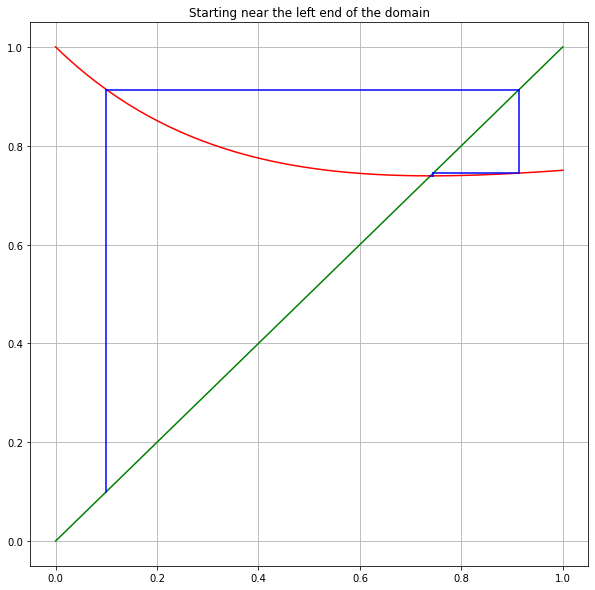

Starting near the right end of the domain
x_0 = 0.9
x_1 = 0.7438928778417369
x_2 = 0.7390902113045812
x_3 = 0.7390851332208545
x_4 = 0.7390851332151607


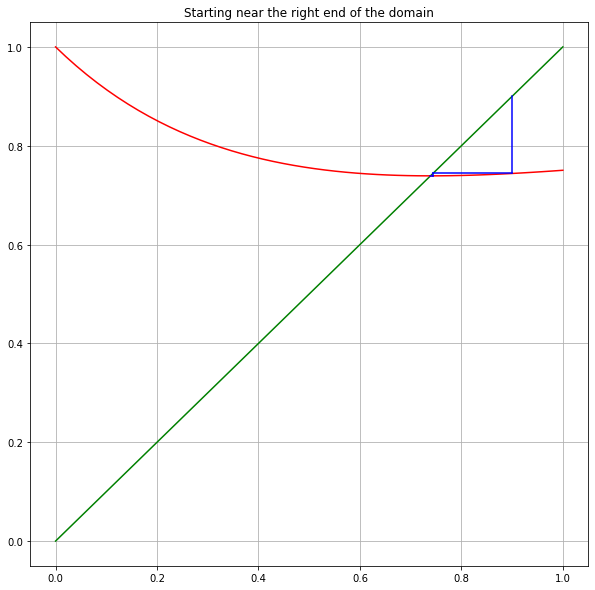

In [7]:
# Start at left
description = 'Starting near the left end of the domain'
print(description)
x_k = 0.1
print(f"x_0 = {x_k}")
plt.figure(figsize=(10,10))
plt.title(description)
plt.grid(True)
plt.plot(x, x, 'g')
plt.plot(x, g(x), 'r')
for k in range(iterations):
    g_x_k = g(x_k)
    # Graph evalation of g(x_k) from x_k:
    plt.plot([x_k, x_k], [x_k, g(x_k)], 'b')
    x_k_plus_1 = g(x_k)
    #Connect to the new x_k on the line y = x:
    plt.plot([x_k, g(x_k)], [x_k_plus_1, x_k_plus_1], 'b')
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    print(f"x_{k+1} = {x_k}")

plt.show()

# Start at right

description = 'Starting near the right end of the domain'
print(description)
x_k = 0.9
print(f"x_0 = {x_k}")
plt.figure(figsize=(10,10))
plt.title(description)
plt.grid(True)
plt.plot(x, x, 'g')
plt.plot(x, g(x), 'r')
for k in range(iterations):
    g_x_k = g(x_k)
    # Graph evalation of g(x_k) from x_k:
    plt.plot([x_k, x_k], [x_k, g(x_k)], 'b')
    x_k_plus_1 = g(x_k)
    #Connect to the new x_k on the line y = x:
    plt.plot([x_k, g(x_k)], [x_k_plus_1, x_k_plus_1], 'b')
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    print(f"x_{k+1} = {x_k}")

In fact, wherever you start, all iterations take you to the right of the root, and then appoache the fixed point monotonically — and very fast.
We will see an explanation for this in the section on
[The Convergence Rate of Newton's Method](convergence-rate-of-newtons-method.ipynb)

### Example 2. Pushing to the limits of standard 64-bit computer arithmetic

Next demand more accuracy; this time silently.
As we will see in a later section, $10^{-16}$ is about the limit of the precision of standard computer arithmetic with 64-bit numbers.

So try to compute the root as accurately as we can within these limits:

In [8]:
(root, errorEstimate, iterations) = newton(f_1, Df_1, x0=0, errorTolerance=1e-16)
print()
print(f"The root is approximately {root}")
print(f"The estimated absolute error is {errorEstimate}")
print(f"The backward error is {abs(f_1(root)):0.4}")
print(f"This required {iterations} iterations")


The root is approximately 0.7390851332151607
The estimated absolute error is 6.633694101535508e-17
The backward error is 0.0
This required 6 iterations


Observations:
- It only took one more iteration to meet the demand for twice as many decimal places of accuracy.
- The result is "exact" as fas as the computer arithmeric can tell, as shown by the zero backward error:
we have indeed reached the accuracy limits of computer arithmetic.

## Newton's method works with complex numbers too

We will work almost entirely with real values and vectors in $\mathbb{R}^n$, but actually,
everything above also works for complex numbers.
In particular, Newton's method works for finding roots of functions $f:\mathbb{C} \to \mathbb{C}$;
for example when seeking all roots of a polynomial.

### Aside: notation for complex number in Python
Python uses `j` for the square root of -1 (as is also sometimes done in engineering) rather than `i`.

In general, the complex number $a + b i$ is expressed as `a+bj` (note: `j` at the end, and no spaces).
As you might expect, imaginary numbers can be written without the $a$, as `bj`.

However, the coefficient `b` is always needed, even when $b=1$: the square roots of -1 are `1j` and `-1j`,
not `j` and `-j`, and the latter pair still refer to a variable `j` and its negation.

In [9]:
z = 3+4j
print(z)
print(abs(z))

(3+4j)
5.0


In [10]:
print(1j)

1j


In [11]:
print(-1j)

(-0-1j)


but:

In [12]:
print(j)

NameError: name 'j' is not defined

In [13]:
print(-j)

NameError: name 'j' is not defined

Giving `j` a value does not interfere:

In [14]:
j = 100

In [15]:
print(1j)

1j


In [16]:
print(j)

100


### Example 3. All roots of a cubic

As an example, let us seek all three cube roots of 8,
by solving $x^3 - 8 = 0$ and trying different initial values $x_0$.

In [17]:
def f_2(x): return x**3 - 8
def Df_2(x): return 3*x**2

#### First, $x_0 = 1$

In [18]:
(root1, errorEstimate1, iterations1) = newton(f_2, Df_2, x0=1., errorTolerance=1e-8, demoMode=True)
print()
print(f"The first root is approximately {root1}")
print(f"The estimated absolute error is {errorEstimate1}")
print(f"The backward error is {abs(f_2(root1)):0.4}")
print(f"This required {iterations1} iterations")

At iteration 1 x = 3.3333333333333335 with estimated error 2.3333333333333335, backward error 29.04
At iteration 2 x = 2.462222222222222 with estimated error 0.8711111111111113, backward error 6.927
At iteration 3 x = 2.081341247671579 with estimated error 0.380880974550643, backward error 1.016
At iteration 4 x = 2.003137499141287 with estimated error 0.07820374853029163, backward error 0.03771
At iteration 5 x = 2.000004911675504 with estimated error 0.003132587465783101, backward error 5.894e-05
At iteration 6 x = 2.0000000000120624 with estimated error 4.911663441917921e-06, backward error 1.447e-10
At iteration 7 x = 2.0 with estimated error 1.2062351117801901e-11, backward error 0.0

The first root is approximately 2.0
The estimated absolute error is 1.2062351117801901e-11
The backward error is 0.0
This required 7 iterations


#### Next, start at $x_0 = i$ (a.k.a. $x_0 = j$):

In [26]:
(root2, errorEstimate2, iterations2) = newton(f_2, Df_2, x0=1j, errorTolerance=1e-8, demoMode=True)
print()
print(f"The second root is approximately {root2}")
print(f"The estimated absolute error is {errorEstimate2:0.3}")
print(f"The backward error is {abs(f_2(root2)):0.3}")
print(f"This required {iterations2} iterations")

At iteration 1 x = (-2.6666666666666665+0.6666666666666667j) with estimated error 2.6874192494328497, backward error 27.24
At iteration 2 x = (-1.4663590926566705+0.6105344098423685j) with estimated error 1.2016193667222375, backward error 10.21
At iteration 3 x = (-0.23293230984230862+1.157138282313884j) with estimated error 1.3491172750968108, backward error 7.207
At iteration 4 x = (-1.920232195343855+1.5120026439880303j) with estimated error 1.7242127533456917, backward error 13.41
At iteration 5 x = (-1.1754417924325353+1.4419675366055333j) with estimated error 0.7480759724352093, backward error 3.758
At iteration 6 x = (-0.9389355523964146+1.7160019741718067j) with estimated error 0.36198076543966656, backward error 0.741
At iteration 7 x = (-1.0017352527552088+1.7309534907089796j) with estimated error 0.06455501693838897, backward error 0.02464
At iteration 8 x = (-0.9999988050398477+1.7320490713246675j) with estimated error 0.0020531798639315357, backward error 2.529e-05
At ite

This root is in fact $-1 + i \sqrt{3}$.

#### Finally, $x_0 = 1 - i$

In [20]:
(root3, errorEstimate3, iterations3) = newton(f_2, Df_2, x0=1-1j, errorTolerance=1e-8, demoMode=True)
print()
print(f"The third root is approximately {root3}")
print(f"The estimated absolute error is {errorEstimate3}")
print(f"The backward error is {abs(f_2(root3)):0.4}")
print(f"This required {iterations3} iterations")

At iteration 1 x = (0.6666666666666667+0.6666666666666667j) with estimated error 1.699673171197595, backward error 8.613
At iteration 2 x = (0.4444444444444445-2.5555555555555554j) with estimated error 3.229875967499696, backward error 22.51
At iteration 3 x = (-0.07676321047922768-1.569896785094159j) with estimated error 1.1149801035617206, backward error 8.367
At iteration 4 x = (-1.1254435853845144-1.1519065719451076j) with estimated error 1.1289137907740705, backward error 5.707
At iteration 5 x = (-0.7741881838023246-1.795866873743186j) with estimated error 0.7335292955516757, backward error 2.741
At iteration 6 x = (-0.9948382000303204-1.7041989873110566j) with estimated error 0.23893394707397406, backward error 0.3354
At iteration 7 x = (-0.9999335177403226-1.7324537997991796j) with estimated error 0.02871056758938863, backward error 0.004902
At iteration 8 x = (-0.9999999373245746-1.7320508625807844j) with estimated error 0.00040837478269381517, backward error 1.001e-06
At iter

This root is in fact $-1 - i \sqrt{3}$.

## Newton's method derived via tangent line approximations: linearization

The more traditional derivation of Newton's method is based on the very widely useful idea of *linearization*;
using the fact that a differentiable function can be approximated over a small part of its domain by a straight line — its tangent line — and it is easy to compute the root of this linear function.

So start with a first approximation $x_0$ to a solution $r$ of $f(x) = 0$.

### Step 1: Linearize at $x_0$.

The tangent line to the graph of this function wih center $x_0$,
also know as the *linearization of $f$ at $x_0$*, is

$$L_0(x) = f(x_0) + f'(x_0) (x - x_0).$$

(Note that $L_0(x_0) = f(x_0)$ and $L_0'(x_0) = f'(x_0)$.)

### Step 2: Find the zero of this linearization

Hopefully, the two functions $f$ and $L_0$ are close, so that the root of $L_0$ is close to a root of $f$;
close enough to be a better approximation of the root $r$ than $x_0$ is.

Give the name $x_1$ to this root of $L_0$:
it solves $L_0(x_1) = f(x_0) + f'(x_0) (x_1 - x_0) = 0$, so

$$x_1 = x_0 - {f(x_0)}/{f'(x_0)}$$

### Step 3: Iterate

We can then use this new value $x_1$ as the center for a new linearization
$L_1(x) = f(x_1) + f'(x_1)(x - x_1)$,
and repeat to get a hopefully even better approximate root,

$$x_2 = x_1 - f(x_1)/f'(x_1)$$

And so on: at each step, we get from approximation $x_k$ to a new one $x_{k+1}$ with

$$x_{k+1} = x_k - {f(x_k)}/{f'(x_k)}$$

And indeed this is the same formula seen above for Newton's method.

### Illustration: a few steps of Newton's method for $x - \cos(x) = 0$.

This approach to Newton's method via linearization and tangent lines suggests another graphical presentation;
again we use the example of $f(x) = x - \cos (x)$.
This has $Df(x) = 1 + \sin(x)$, so the linearization at center $a$ is

$$L(x) = (a - \cos(a)) + (1 + \sin(a))(x-a)$$

For Newton's method starting at $x_0 = 0$, this gives

$$L_0(x) = -1 + x$$

and its root — the next iterate in Newton's method — is $x_1 = 1$

Then the linearization at center $x_1$ is

$$
L_1(x) = (1 - \cos(1) + (1 + \sin(1))(x-1),
\approx 0.4596 + 1.8415(x-1)
$$
giving $x_2 \approx 1 - 0.4596/1.8415 \approx 0.7504$.

Let's graph a few steps.

In [21]:
def L_0(x): return -1 + x

x_1=1.0


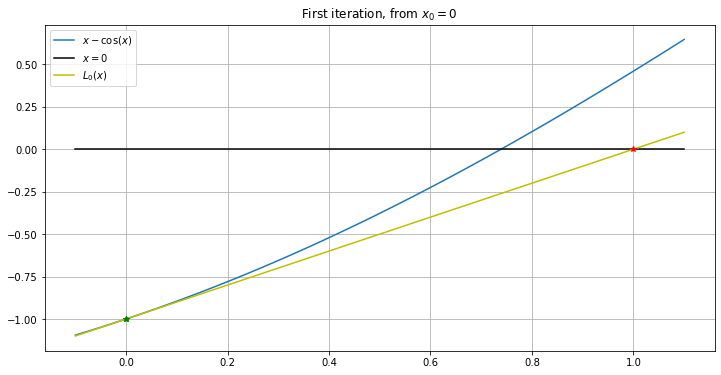

In [22]:
figure(figsize=(12,6))
title('First iteration, from $x_0 = 0$')
left = -0.1
right = 1.1
x = linspace(left, right)
plot(x, f_1(x), label='$x - \cos(x)$')
plot([left, right], [0, 0], 'k', label="$x=0$")  # The x-axis, in black
x_0 = 0
plot([x_0], [f_1(x_0)], 'g*')
plot(x, L_0(x), 'y', label='$L_0(x)$')
plot([x_0], [f_1(x_0)], 'g*')
x_1 = x_0 - f_1(x_0)/Df_1(x_0)
print(f'{x_1=}')
plot([x_1], [0], 'r*')
legend()
grid(True)

x_2=0.7503638678402439


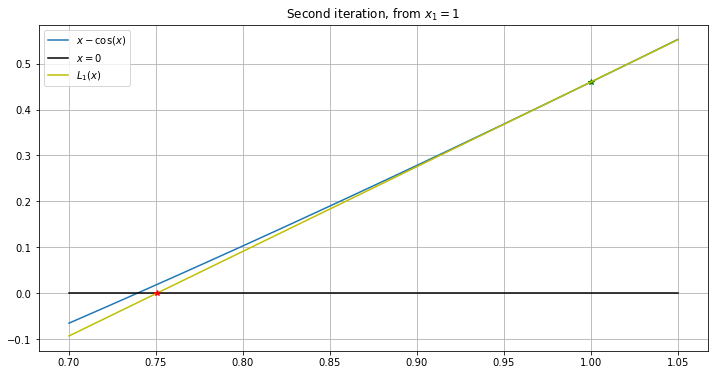

In [23]:
def L_1(x): return (x_1 - cos(x_1)) +  (1 + sin(x_1))*(x - x_1)

figure(figsize=(12,6))
title('Second iteration, from $x_1 = 1$')
# Shrink the domain
left = 0.7
right = 1.05
x = linspace(left, right)

plot(x, f_1(x), label='$x - \cos(x)$')
plot([left, right], [0, 0], 'k', label="$x=0$")  # The x-axis, in black
plot([x_1], [f_1(x_1)], 'g*')
plot(x, L_1(x), 'y', label='$L_1(x)$')
x_2 = x_1 - f_1(x_1)/Df_1(x_1)
print(f'{x_2=}')
plot([x_2], [0], 'r*')
legend()
grid(True)

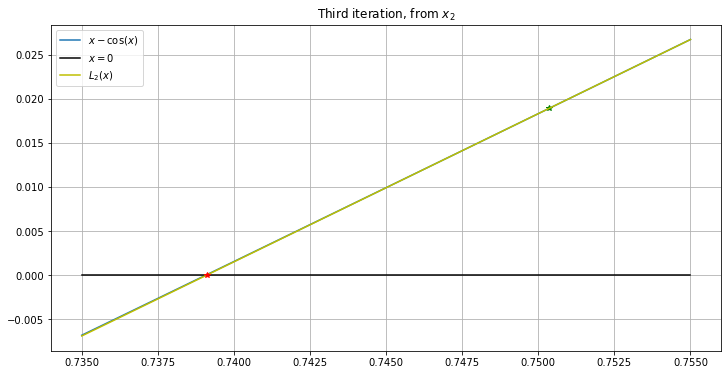

In [24]:
def L_2(x): return (x_2 - cos(x_2)) +  (1 + sin(x_2))*(x - x_2)

figure(figsize=(12,6))
title('Third iteration, from $x_2$')
# Shrink the domain some more
left = 0.735
right = 0.755
x = linspace(left, right)

plot(x, f_1(x), label='$x - \cos(x)$')
plot([left, right], [0, 0], 'k', label="$x=0$")  # The x-axis, in black
plot([x_2], [f_1(x_2)], 'g*')
plot(x, L_2(x), 'y', label='$L_2(x)$')
x_3 = x_2 - f_1(x_2)/Df_1(x_2)
plot([x_3], [0], 'r*')
legend()
grid(True)

## How accurate and fast is this?

For the bisection method, we have seen in the section on
[Root Finding by Interval Halving](root-finding-by-interval-halving.ipynb)
a fairly simple way to get an upper limit on the absolute error in the approximations.

For absolute guarantees of accuracy, things do not go quite as well for Newton's method,
but we can at least get a very "probable" *estimate* of how large the error can be.
This requires some calculus, and more specifically Taylor's theorem,
reviewed in the section on
[Taylor's Theorem and the Accuracy of Linearization](taylors-theorem.ipynb).

So we will return to the question of both the speed and accuracy of Newton's method in
[The Convergence Rate of Newton's Method](convergence-rate-of-newtons-method.ipynb).

On the other hand, the example graphs above illustrate that the successive linearizations become ever more accurate as approximations of the function $f$ itself, so that the approximation $x_3$ looks "perfect" on the graph —
the speed of Newton's method looks far better than for bisection.
This will also be explained in [The Convergence Rate of Newton's Method](convergence-rate-of-newtons-method.ipynb).

---

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)